# A/B Testing Project — Analysis Notebook
This notebook demonstrates how to load data, run statistical tests, perform cohort analysis, and generate visualizations.

In [39]:
import sys, os
sys.path.append(os.path.abspath("./src"))

from ab_test import ABTestAnalyzer
from cohort_builder import CohortAnalyzer
from visualizations import ABTestVisualizer
from analysis_extensions import run_full_extended_report
import pandas as pd


## Load A/B Test Data

In [42]:
ab = ABTestAnalyzer()
data = ab.get_ab_test_data()
data.head()

Loaded data for 32500 users


,user_id,group_id,group_name,transaction_count,total_revenue,converted
0,1,1,control,0,NaN,0
1,2,1,control,0,NaN,0
2,3,1,control,0,NaN,0
3,4,2,treatment,0,NaN,0
4,5,1,control,0,NaN,0


## Conversion & Revenue Metrics

In [45]:
conversion = ab.calculate_conversion_rate(data)
revenue = ab.calculate_revenue_metrics(data)
conversion, revenue

(  group_name  users  conversions  conversion_rate
 0    control  16208           49             0.30
 1  treatment  16292           51             0.31,
   group_name  users  total_revenue  avg_revenue_per_user  std_revenue
 0    control  16208    12235786.63             249709.93     12888.02
 1  treatment  16292    12922203.02             253376.53     15010.39)

## Statistical Tests

In [48]:
control = data[data['group_name'] == 'control']
treatment = data[data['group_name'] == 'treatment']
ab.z_test_proportions(control, treatment)

{'control_conversion_rate': 0.30231984205330703,
 'treatment_conversion_rate': 0.3130370734102627,
 'lift_percentage': 3.5449976700722052,
 'z_statistic': 0.17442297762962664,
 'p_value': 0.8615330575608842,
 'statistically_significant': False,
 'confidence_interval_95': (-0.10971285041952489, 0.1311473131334363)}

## Cohort Analysis

In [51]:
coh = CohortAnalyzer()
cohort_df = coh.get_cohort_data()
retention = coh.calculate_cohort_retention(cohort_df)
retention.head()

Loaded 82400 records for cohort analysis


,cohort_month,group_name,period_number,users,cohort_size,retention_rate
0,2022-03-01,control,12,2,2,100.0
1,2022-03-01,control,13,2,2,100.0
2,2022-03-01,control,14,2,2,100.0
3,2022-03-01,control,15,2,2,100.0
4,2022-03-01,control,16,2,2,100.0


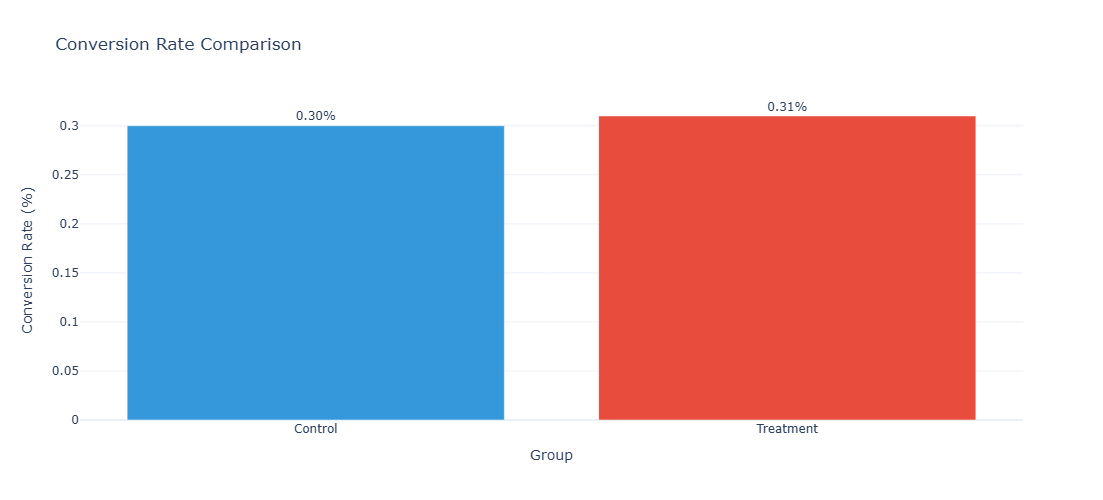

In [52]:
viz = ABTestVisualizer(save_dir='notebook_plots')
fig = viz.plot_conversion_rate(conversion)
fig.show()

## Visualizations — Basic

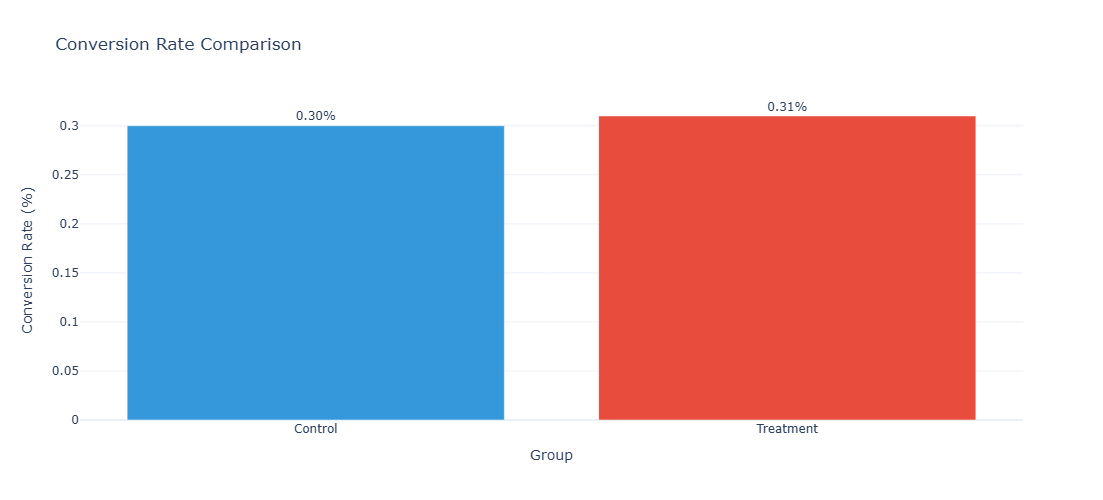

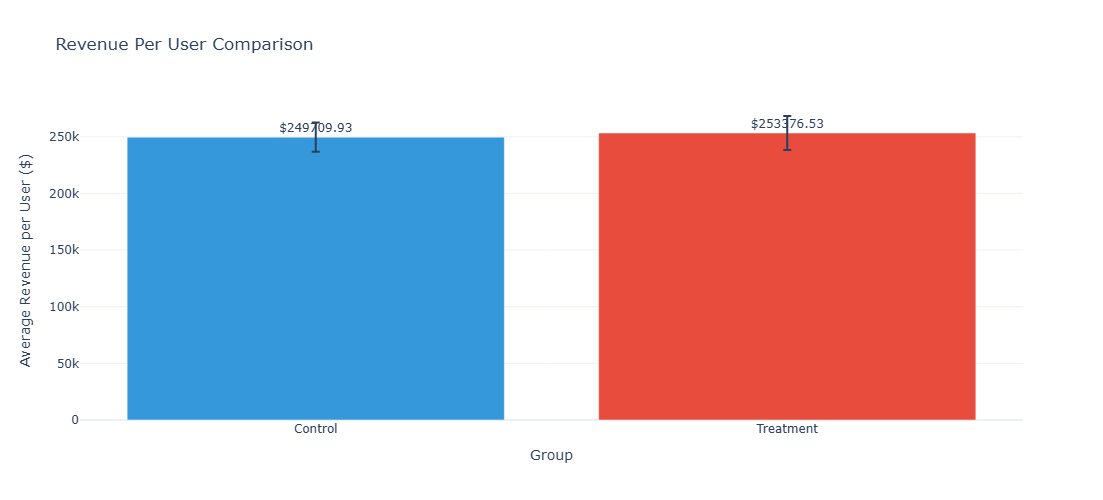

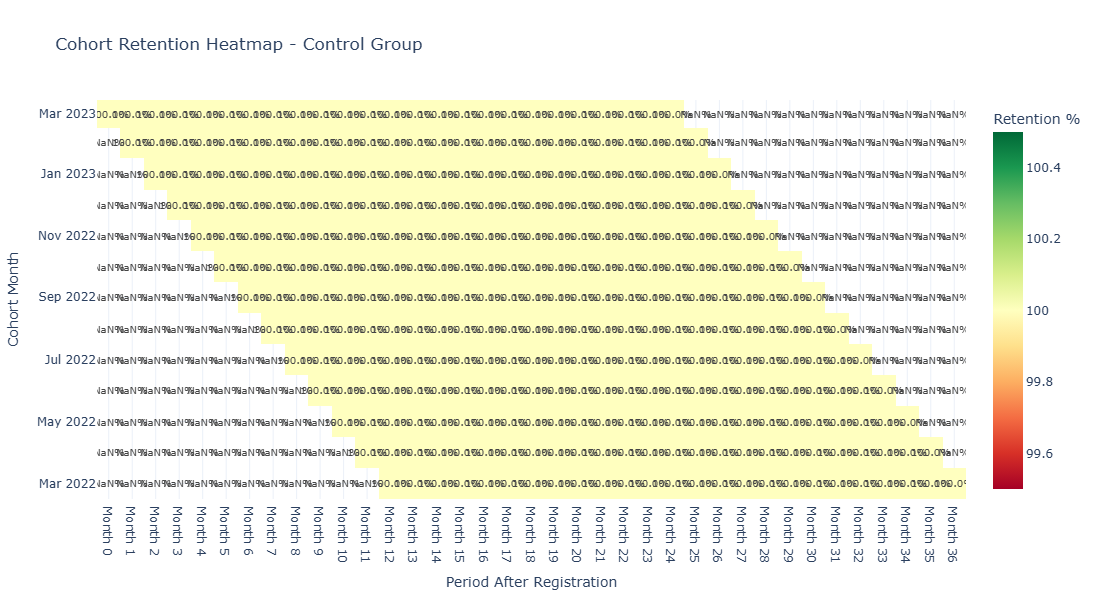

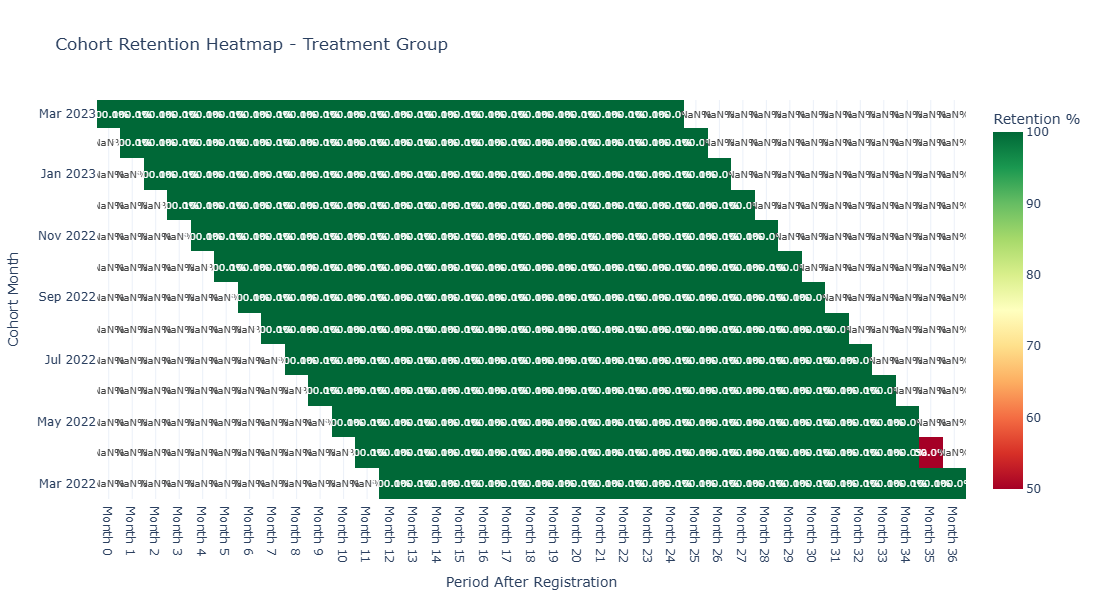

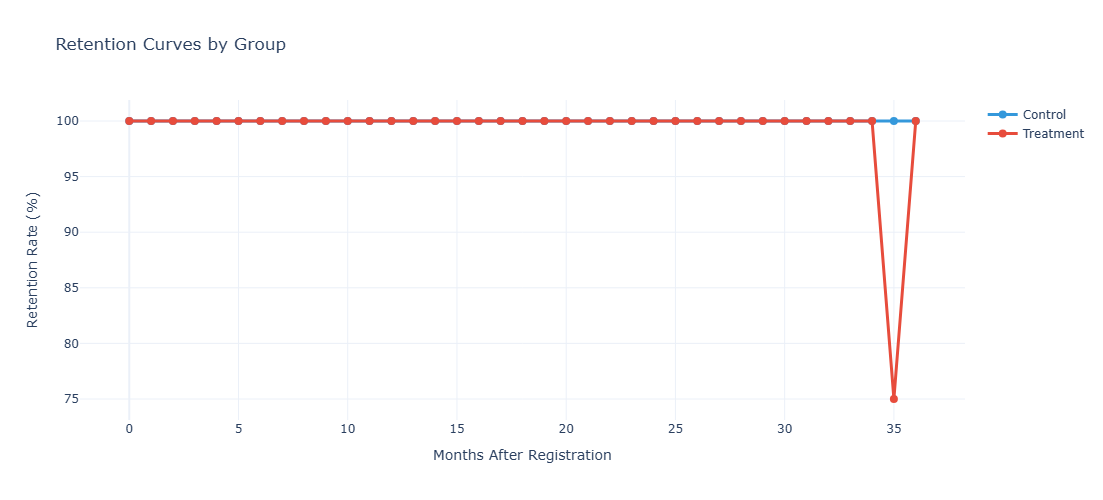

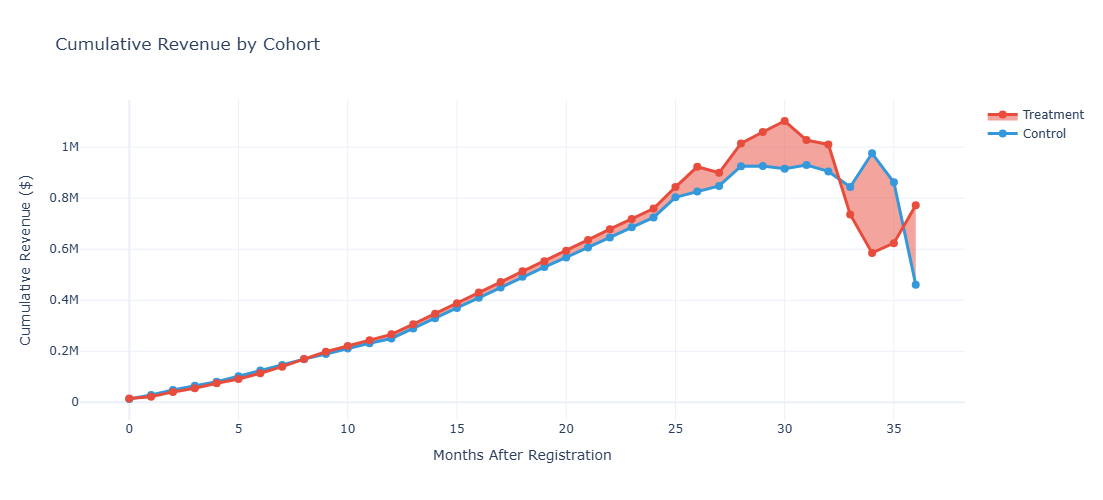

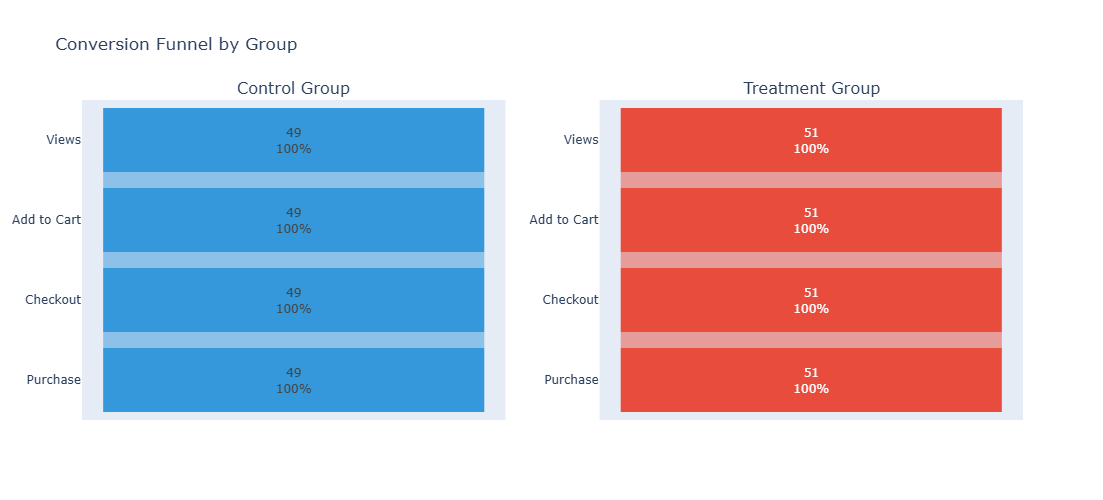

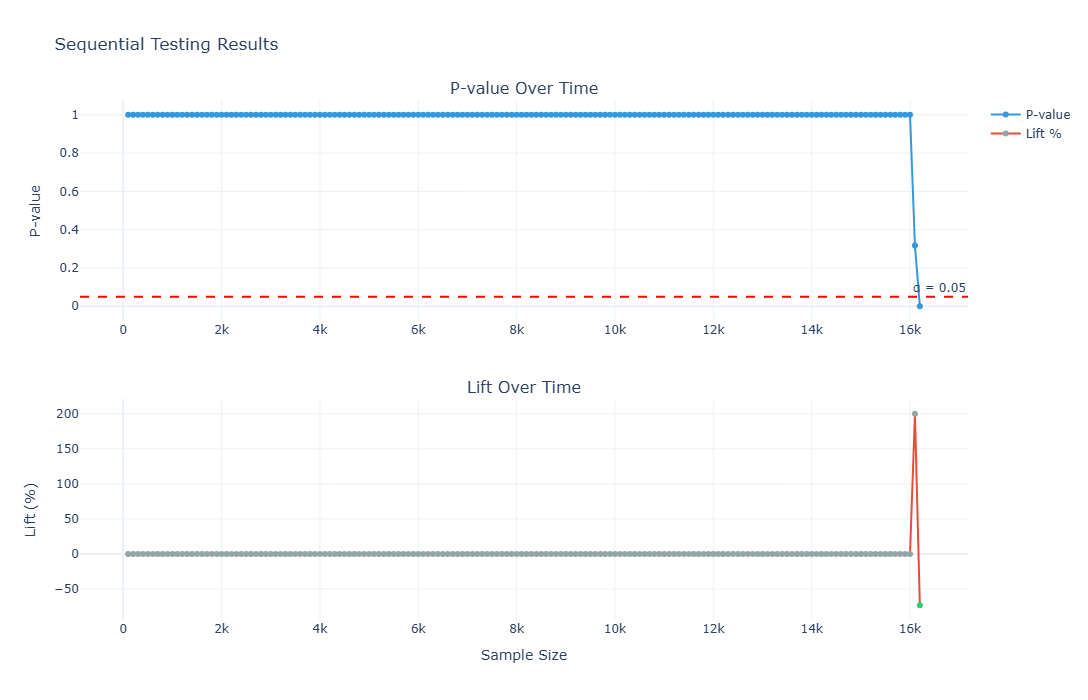

In [56]:
# Conversion Rate
fig_conv = viz.plot_conversion_rate(conversion)
fig_conv.show()

# Revenue Comparison
fig_rev = viz.plot_revenue_comparison(revenue)
fig_rev.show()

# Cohort Retention Heatmaps
pivots = coh.create_cohort_pivot_table(retention)
for g, p in pivots.items():
    fig_hm = viz.plot_cohort_heatmap(p, g)
    fig_hm.show()

# Retention Curves
fig_ret = viz.plot_retention_curves(retention)
fig_ret.show()

# Cumulative Revenue
rev = coh.calculate_cohort_revenue(cohort_df)
fig_cr = viz.plot_cumulative_revenue(rev)
fig_cr.show()

# Funnel Analysis
try:
    funnel_df = pd.read_sql("SELECT * FROM conversion_funnel", coh.engine)
    fig_fun = viz.plot_funnel_analysis(funnel_df)
    fig_fun.show()
except Exception as e:
    print("Funnel table not found:", e)

# Sequential Testing
seq = ab.sequential_testing(data)
fig_seq = viz.plot_sequential_testing(seq)
fig_seq.show()

In [57]:
from analysis_extensions import run_full_extended_report
report = run_full_extended_report(ab, coh, viz, data, conversion, revenue, retention, cohort_df)
print(report)


{'md_path': 'analysis_report\\ab_report_20251205_234038.md', 'pdf_path': None, 'saved_plots': {'conversion': 'analysis_report\\plots\\conversion_rate.png', 'revenue': 'analysis_report\\plots\\revenue_comparison.png', 'cohort_heatmaps': {'control': 'analysis_report\\plots\\cohort_heatmap_control.png', 'treatment': 'analysis_report\\plots\\cohort_heatmap_treatment.png'}, 'retention_curves': 'analysis_report\\plots\\retention_curves.png', 'cumulative_revenue': 'analysis_report\\plots\\cumulative_revenue.png', 'funnel': 'analysis_report\\plots\\funnel.png', 'sequential': 'analysis_report\\plots\\sequential_testing.png'}, 'summary': {'total_rows': 32500, 'by_group':   group_name  users  conversions  transaction_count  total_revenue  \
0    control  16208           49              24425    12235786.63   
1  treatment  16292           51              25575    12922203.02   

   conversion_rate  
0         0.003023  
1         0.003130  , 'balance_ratio': 0.005155904738521974, 'overall_convers